# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**



## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [7]:
# No null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

In [9]:
# CODE HERE!

<AxesSubplot:xlabel='target', ylabel='count'>

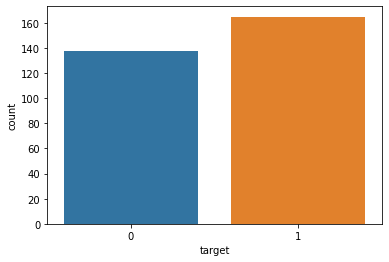

In [14]:
sns.countplot(x=df['target'],data=df)

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

In [19]:
cols= df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

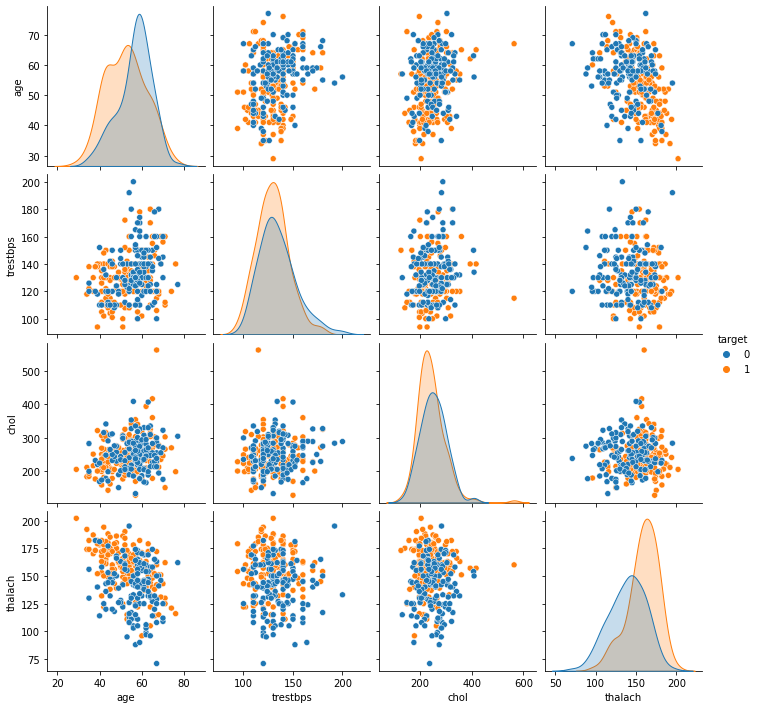

In [17]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

**TASK: Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

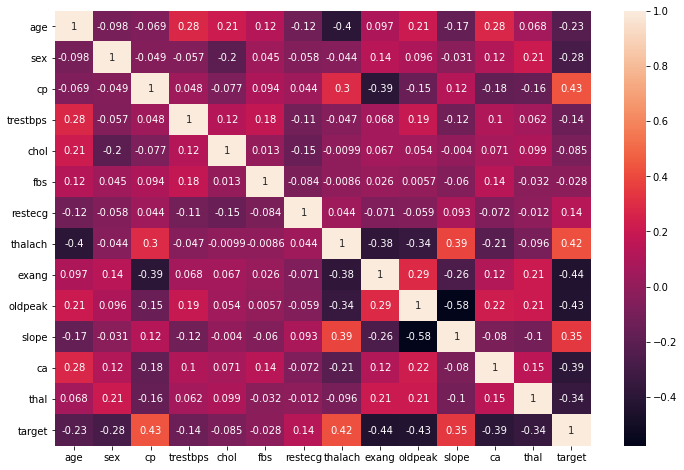

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [23]:
X=df.drop('target',axis=1)
y=df['target']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [22]:
scaler = StandardScaler()

In [74]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test) 

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [62]:
model= LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [63]:
# help(LogisticRegressionCV)
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

In [64]:
grid_model= GridSearchCV(model,param_grid={'C':C, 'penalty':penalty})

In [65]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [66]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

### Coeffecients

**TASK: Report back the model's coefficients.**

In [67]:
model= LogisticRegression(penalty='l1',solver='saga',multi_class="ovr",max_iter=5000,C=1.0)
model.fit(scaled_X_train,y_train)
model.coef_

array([[-0.04787506, -0.69652002,  0.88805102, -0.23899787, -0.18651382,
         0.00230905,  0.09604818,  0.42190291, -0.40862786, -0.52457609,
         0.35765569, -0.83235418, -0.56451939]])

In [68]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

***visualization of the coefficients by using a barplot of their values.***

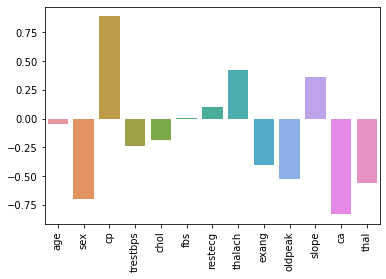

In [69]:
sns.barplot(x=X.columns, y=model.coef_[0])
plt.xticks(rotation=90);

In [70]:
coefs = pd.Series(index=X.columns,data=model.coef_[0])

In [71]:
coefs = coefs.sort_values()

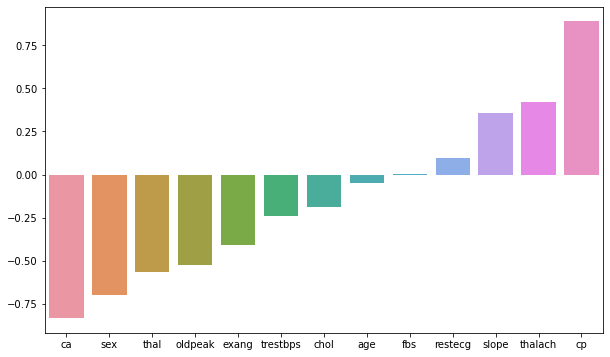

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

In [76]:
y_pred= model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0])

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [89]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve,plot_roc_curve,accuracy_score,plot_precision_recall_curve

In [79]:
print(confusion_matrix(y_test,y_pred))

[[12  3]
 [ 2 14]]


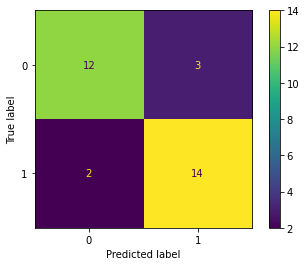

In [82]:
plot_confusion_matrix(model,scaled_X_test,y_test)

In [84]:
print(accuracy_score(y_test,y_pred))

0.8387096774193549


### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

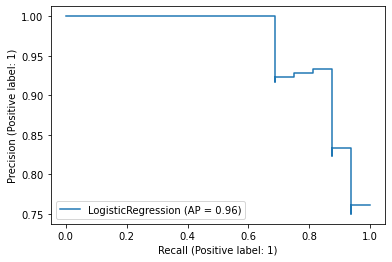

In [90]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

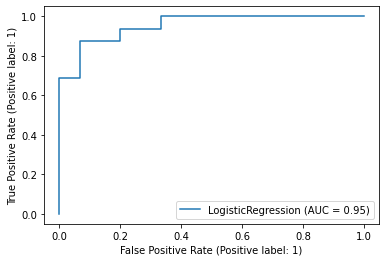

In [91]:
plot_roc_curve(model,scaled_X_test,y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*an array of the features for the patient above*

In [92]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [93]:
model.predict(patient)

array([0])

In [94]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)
model.predict_proba(patient)

array([[1.00000000e+00, 1.29311418e-18]])